# Loan Application Status Prediction

## Problem Definition:-
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

- Independent Variables:

  - Loan_ID

  - Gender

  - Married

  - Dependents

  - Education

  - Self_Employed

  - ApplicantIncome

  - CoapplicantIncome

  - Loan_Amount

  - Loan_Amount_Term

  - Credit History

  - Property_Area

- Dependent Variable (Target Variable):

 - Loan_Status

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

- This is a classsification Problem

## Data Analysis

In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


object dtype:-
    - Loan_ID     
    - Gender
    - Married            
    - Dependents         
    - Education          
    - Self_Employed      
    - Property_Area      
    - Loan_Status        
    
Int dtype:-
    - ApplicantIncome    
    
Float dtype:- 
    - CoapplicantIncome  
    - LoanAmount         
    - Loan_Amount_Term   
    - Credit_History     
    
    
    
The following columns might have wrong entries.

- Dependents (It's shown in number in the dataframe tho this is showing it as the object dtype)
- 

In [6]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

The dependents have special charechter 3+, this is why it is being displayed as object.

In [7]:
# checking for null values.

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Gender               
- Married               
- Dependents           
- Self_Employed        
- LoanAmount           
- Loan_Amount_Term     
- Credit_History       

These data set have null values.

In [8]:
# Treating null values.

In [9]:
# using mode to fill null value in object column.

In [10]:
print(df["Gender"].mode())
df['Gender']=df['Gender'].fillna(df["Gender"].mode()[0])

0    Male
dtype: object


In [11]:
print(df["Married"].mode())
df['Married']=df['Married'].fillna(df["Married"].mode()[0])

0    Yes
dtype: object


In [12]:
print(df["Self_Employed"].mode())
df['Self_Employed']=df['Self_Employed'].fillna(df["Self_Employed"].mode()[0])

0    No
dtype: object


In [13]:
print(df["Self_Employed"].mode())
df['Self_Employed']=df['Self_Employed'].fillna(df["Self_Employed"].mode()[0])

0    No
dtype: object


In [14]:
print(df["Dependents"].mode())
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

0    0
dtype: object


In [15]:
print(df["Credit_History"].median())
df['Credit_History']=df['Credit_History'].fillna(df["Credit_History"].median())

1.0


In [16]:
print(df["LoanAmount"].median())
df['LoanAmount']=df['LoanAmount'].fillna(df["LoanAmount"].median())

128.0


In [17]:
print(df["Loan_Amount_Term"].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].median())

360.0


In [18]:
# rechecking null values.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

looks good, we have no null values so far, still there might be some special charecter, I'll check that later.

##  EDA

### Univariate analysis.

Male      502
Female    112
Name: Gender, dtype: int64

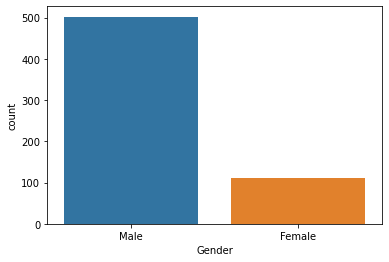

In [19]:
ax=sns.countplot(x='Gender',data=df)
df['Gender'].value_counts()

Theere are 500+ males, while females are just 112.
The number of males are way much than females who applied for loan.

Yes    401
No     213
Name: Married, dtype: int64

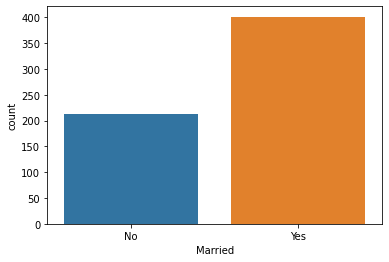

In [20]:
ax=sns.countplot(x='Married',data=df)
df['Married'].value_counts()

Married individuals tend to apply more for the loan. They are twice application than unmarried.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

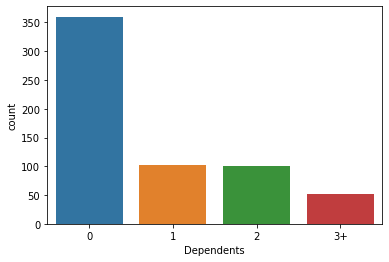

In [21]:
ax=sns.countplot(x='Dependents',data=df)
df['Dependents'].value_counts()

Dependents is a person who relies on another, especially a family member, for financial support.
- Mostly (360) individuals have no dependents in their application form.
- one to two dependents have no such diffrence.
- There are very few applicants who have more than three dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

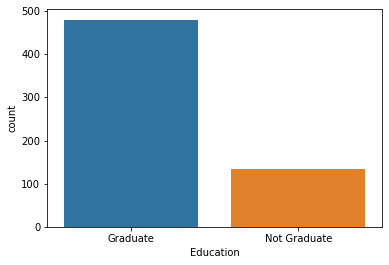

In [22]:
ax=sns.countplot(x='Education',data=df)
df['Education'].value_counts()

The Graduate applicants are more than Undergraduate.


No     532
Yes     82
Name: Self_Employed, dtype: int64

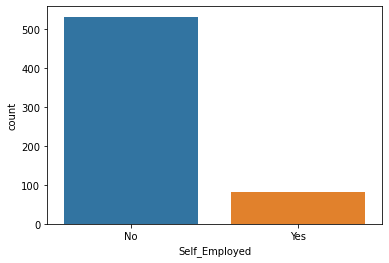

In [23]:
ax=sns.countplot(x='Self_Employed',data=df)
df['Self_Employed'].value_counts()

Very few(82) applicants are Self-Employeed.

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

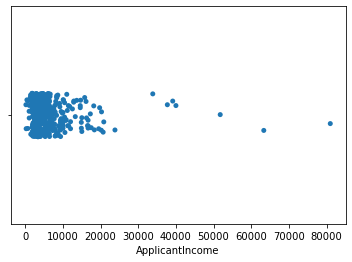

In [24]:
ax=sns.stripplot(x='ApplicantIncome',data=df)
df['ApplicantIncome'].value_counts()

- The majority of applicants have income below 10k
- While there are few who earn near 20k
- There are 7 applicants who earn more than 30k

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

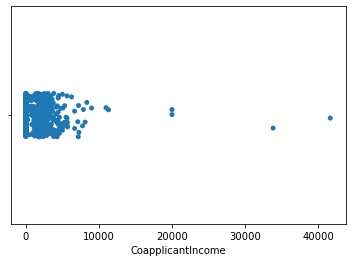

In [25]:
ax=sns.stripplot(x='CoapplicantIncome',data=df)
df['CoapplicantIncome'].value_counts()

The co-applicants have the same trend, they fall under 10k

128.0    33
120.0    20
110.0    17
100.0    15
187.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

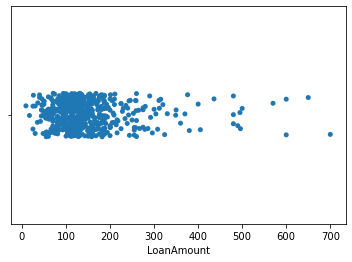

In [26]:
ax=sns.stripplot(x='LoanAmount',data=df)
df['LoanAmount'].value_counts()

- The loan desiered loan amount is from 50 - 200 in max no. of cases.
- tho there are few who asked more than 200.

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

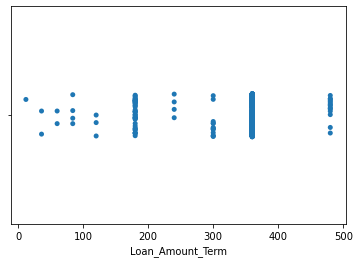

In [27]:
ax=sns.stripplot(x='Loan_Amount_Term',data=df)
df['Loan_Amount_Term'].value_counts()

8 applicants asked for the replay term under 120 days, 
The maximum applicants asked for more than 300 days as the replay term.

1.0    525
0.0     89
Name: Credit_History, dtype: int64

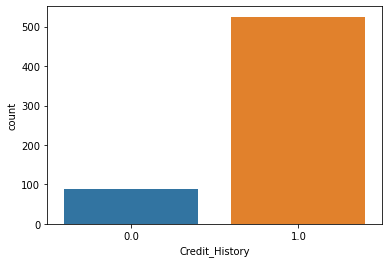

In [28]:
ax=sns.countplot(x='Credit_History',data=df)
df['Credit_History'].value_counts()

- Here 1 represents a GODD credit hhistory.
- While 0 represents BAD credit history.
 
    - 525 applicantes have a good credit history.
    - whereas 89 of them as a bad credit history.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

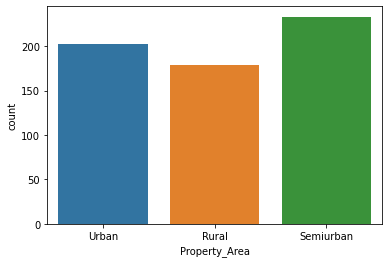

In [29]:
ax=sns.countplot(x='Property_Area',data=df)
df['Property_Area'].value_counts()

Property_Area means the colateral security for  the loan.
 - 233 applicants live in Urban areas.
 - 202 have property in Rural areas.
 - 179 have it in Semi Urban(town).

Y    422
N    192
Name: Loan_Status, dtype: int64

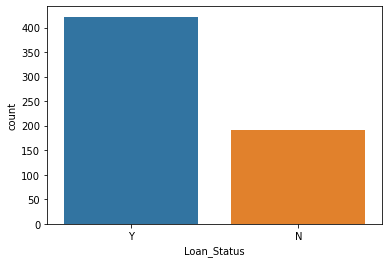

In [30]:
ax=sns.countplot(x='Loan_Status',data=df)
df['Loan_Status'].value_counts()

Out of 614 applicants the loan was passed only for, 422 applicants.

### Bi-variate & MultiVariate Analysis.

In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
# Here i'll try to find out the reasons why and why ont loan is being passed.

In [33]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [34]:
list(enumerate(cat))

[(0, 'Gender'),
 (1, 'Married'),
 (2, 'Dependents'),
 (3, 'Education'),
 (4, 'Self_Employed'),
 (5, 'Property_Area')]

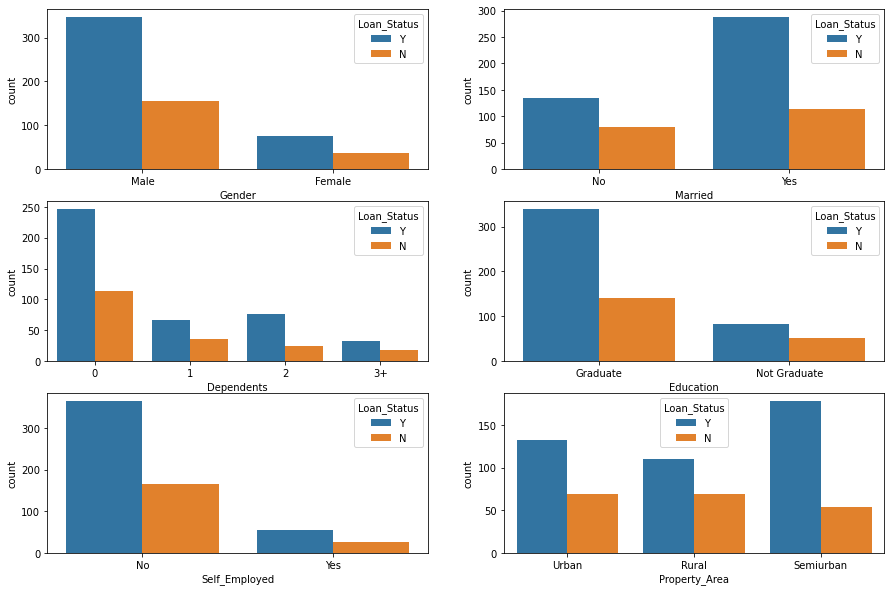

In [35]:
plt.figure(figsize=(15,10))
for i in enumerate(cat):
    plt.subplot(3,2,i[0]+1)
    sns.countplot(i[1],hue='Loan_Status',data=df)
    plt.xticks(rotation = 0)
plt.show()

Gender:- 
    - There are more males applicants than females.
    - loan granted to males is much high than that of females.
    

Married:-
    - Loan granted to married individuals is much more than that of females.
    
Dependents:-
    - Those who have 0 dependents are the most applicants and are the onces who's loans are getting passed.
    
Educaion:-
    - Those who are graduated are getting loan than those who are not.
    
Self Employed:-
    - Those who are self employed are having less chance of getting loan passed.
    
Property area:-
    - Semi urbans applicants are having higher chances for the loan than Urban
    - tho rural area loan is significantly difficult.

### Encoding

In [36]:
# since the data has a lot of categorical  variables, I'll be using Ordinal Encoder.

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
enc=OrdinalEncoder()

In [39]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0


In [41]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

<Figure size 2160x1080 with 0 Axes>

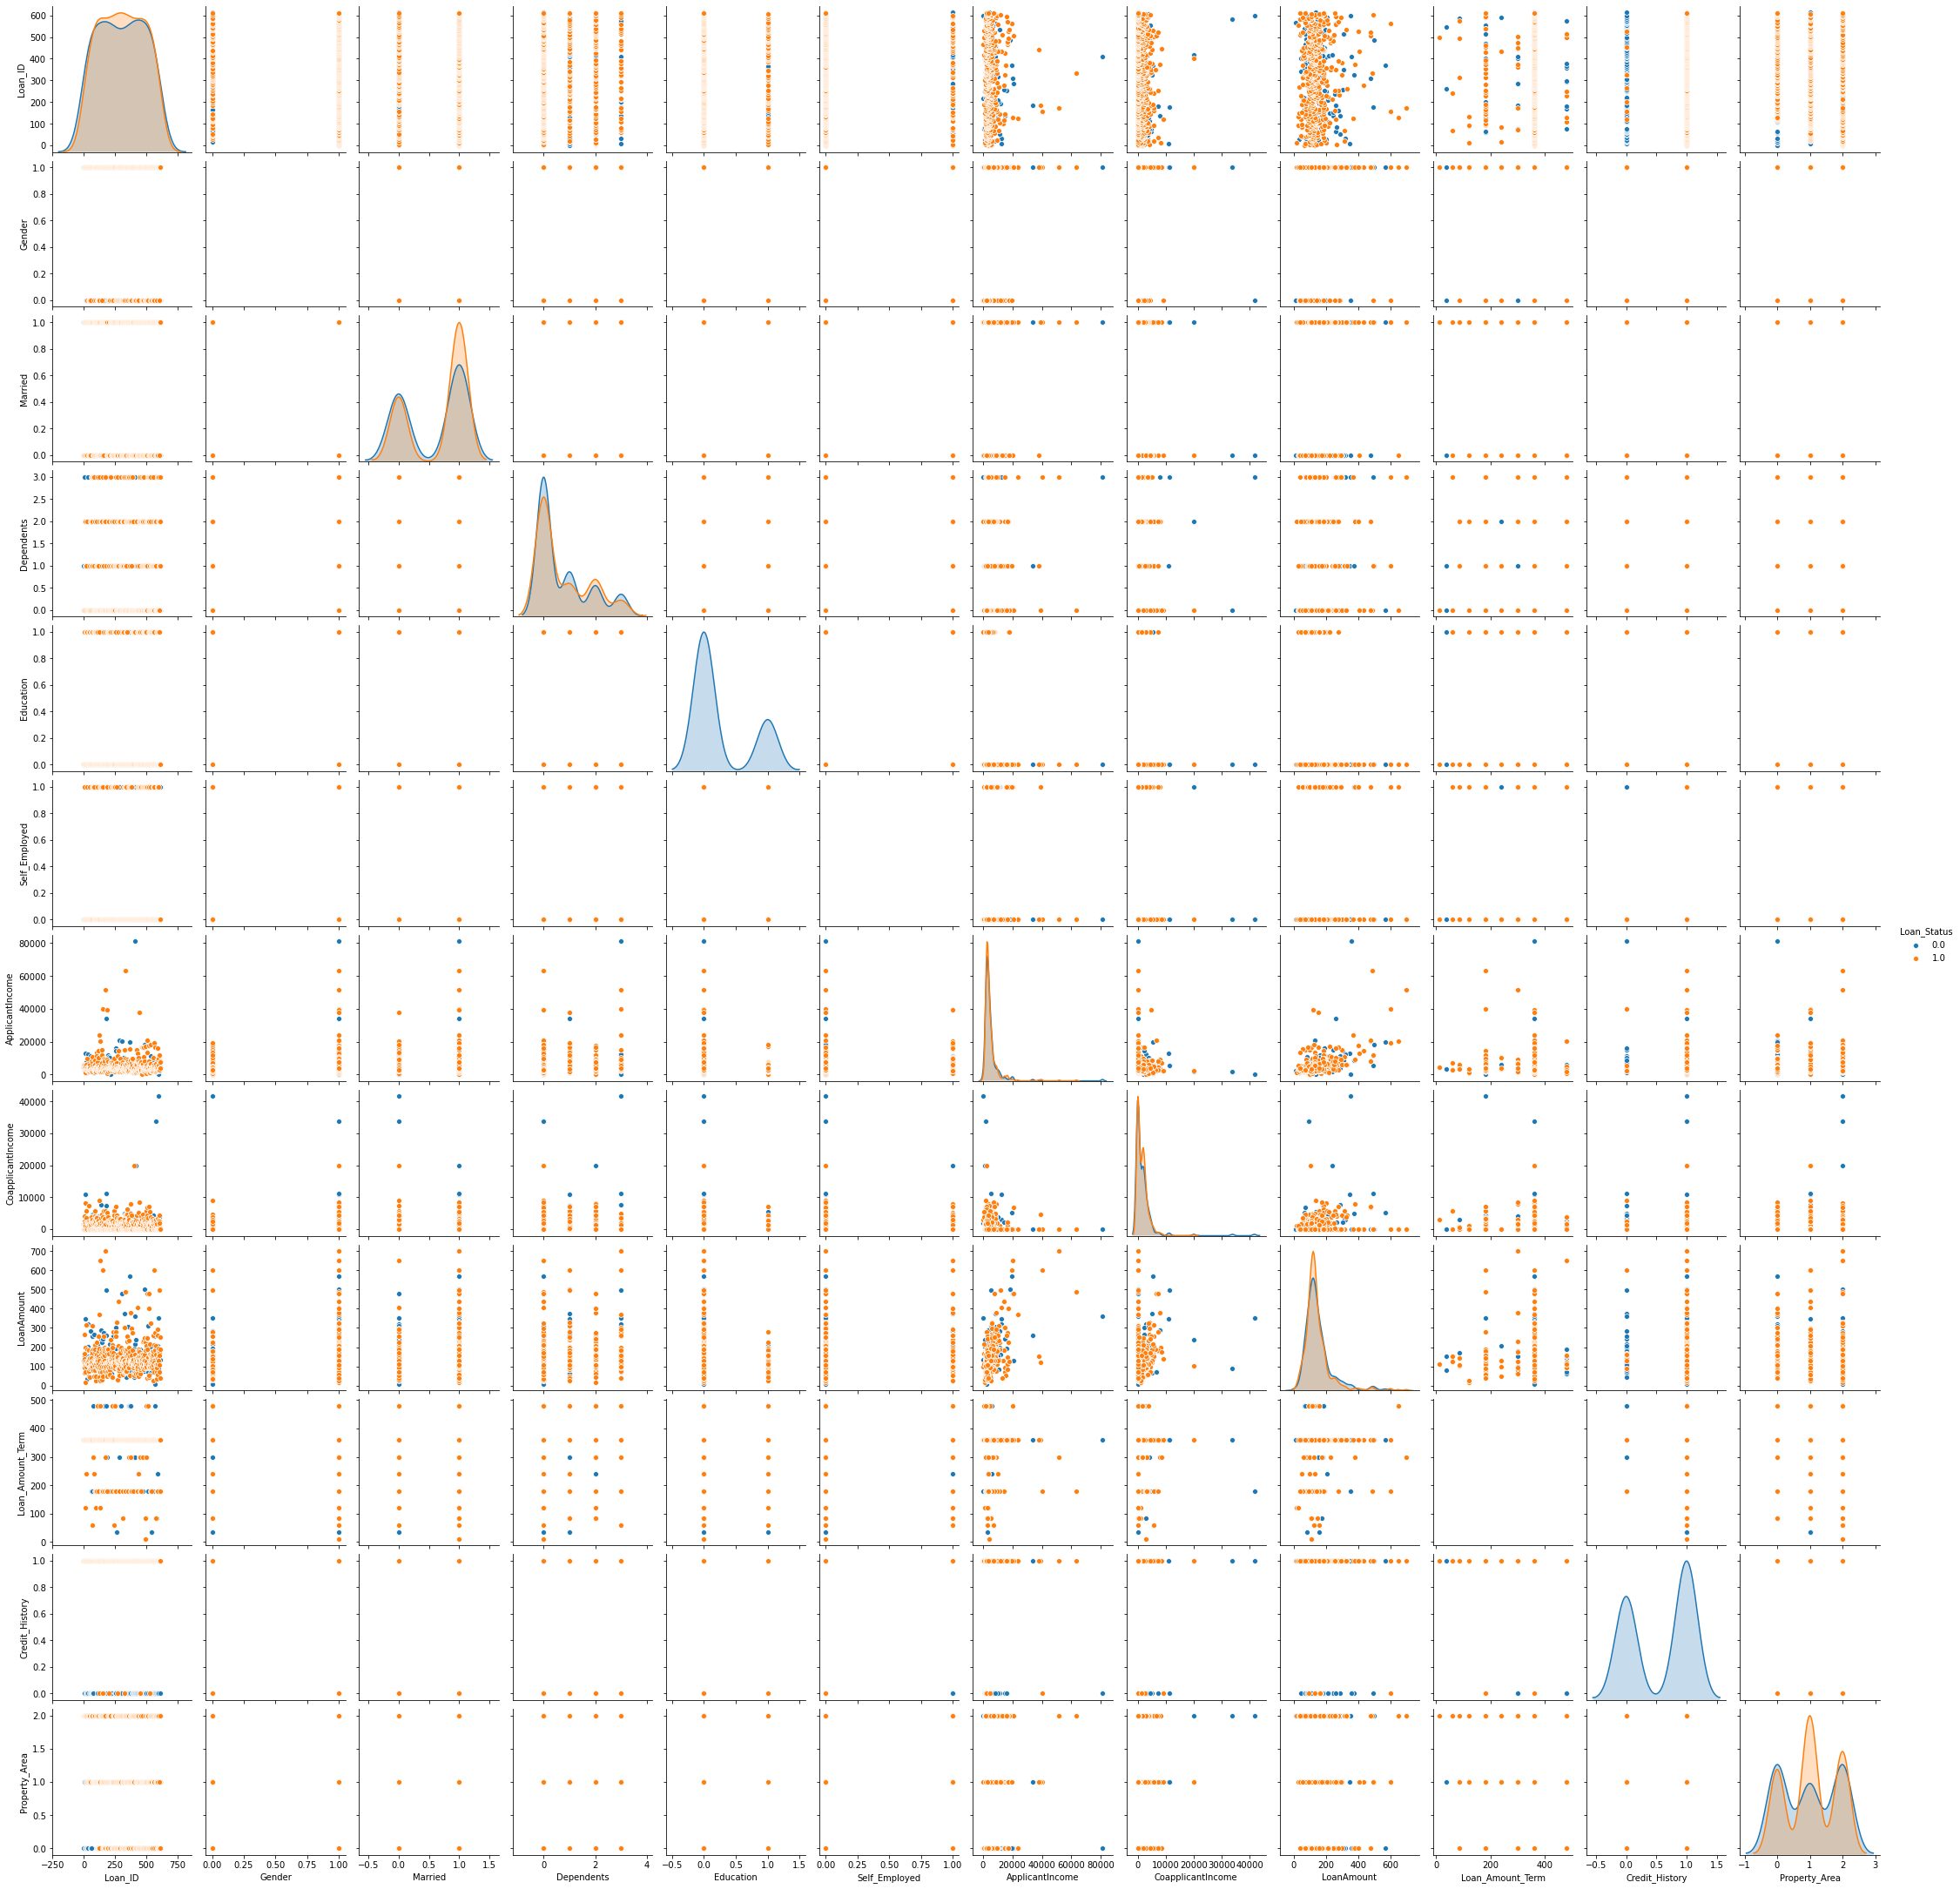

In [42]:
# taking Loan_Status as target variable I'm making a pair plot.

plt.figure(figsize=(30,15))
sns.pairplot(df , hue='Loan_Status')
plt.show()

### Checking corelation

In [43]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


In [44]:
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

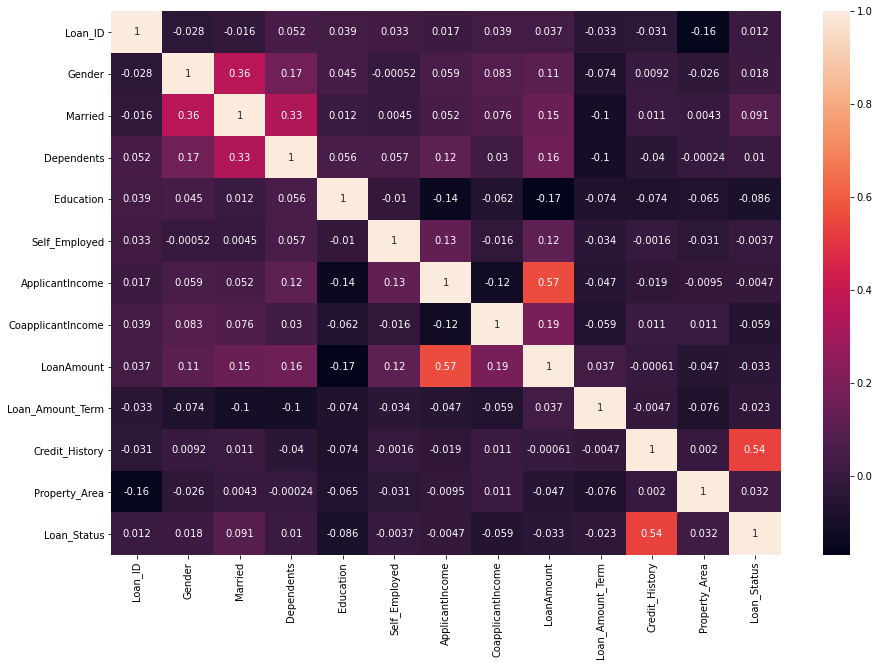

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

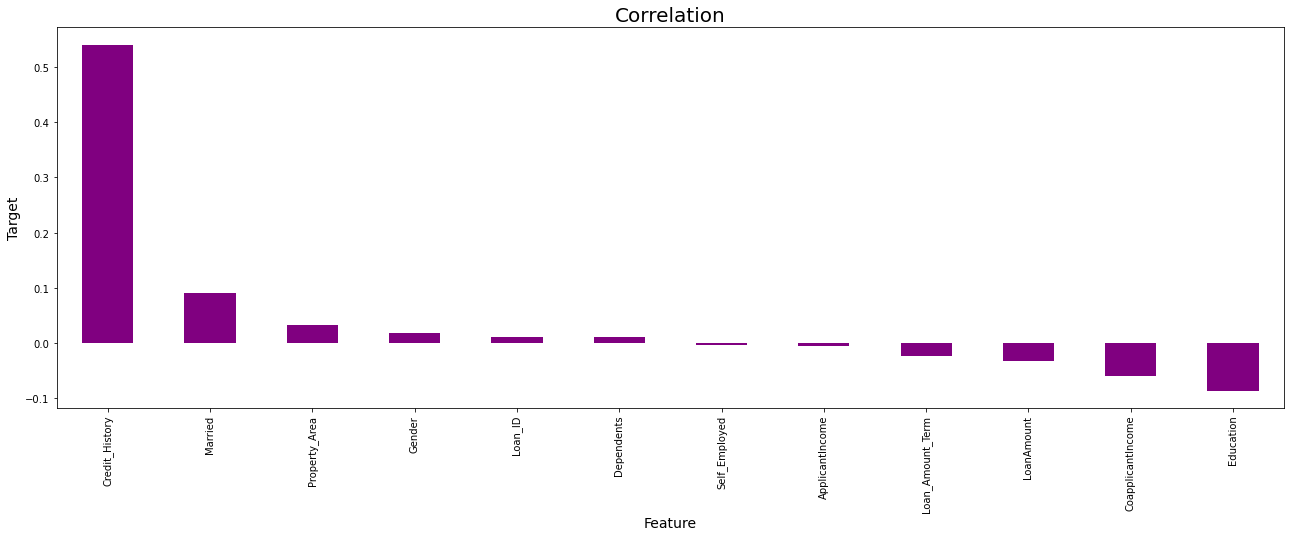

In [46]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- Credit history is highly correlated with the loan_status.( the good the credit history the better will be the loan_status)
- Education is negativly correlated with the loan status. the more the education the less the chances of loan status.

- While others have some relation with the data.


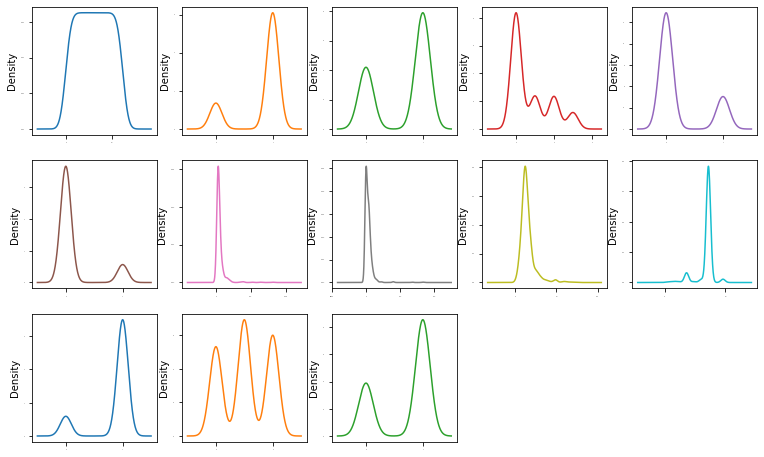

In [47]:
# checking data distribution among all columns.


df.plot(kind='density',subplots=True, layout=(3,5), sharex=False, legend=False, fontsize=1,figsize=(13,8))
plt.show()

here we see that the columns have skewness.

## Pre-processing Pipeline

### Checking Outliers

Loan_ID
AxesSubplot(0.125,0.125;0.775x0.755)


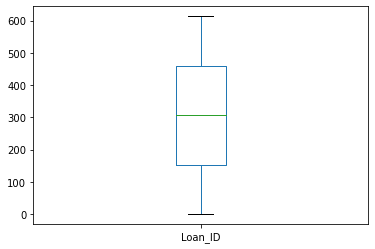

Gender
AxesSubplot(0.125,0.125;0.775x0.755)


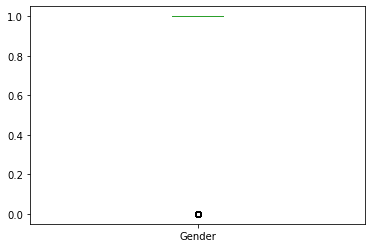

Married
AxesSubplot(0.125,0.125;0.775x0.755)


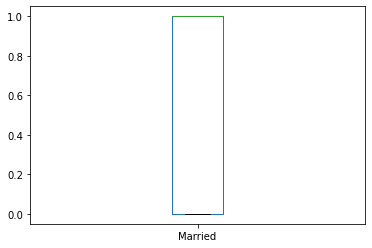

Dependents
AxesSubplot(0.125,0.125;0.775x0.755)


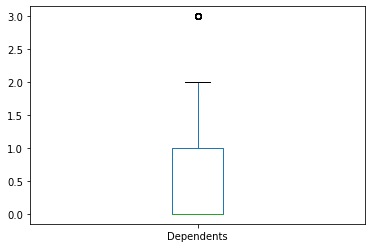

Education
AxesSubplot(0.125,0.125;0.775x0.755)


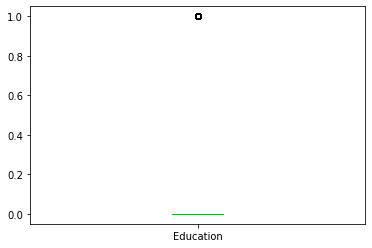

Self_Employed
AxesSubplot(0.125,0.125;0.775x0.755)


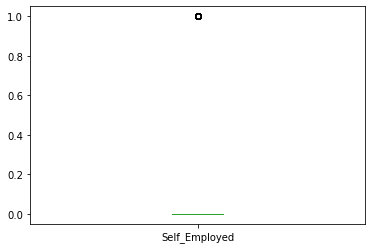

ApplicantIncome
AxesSubplot(0.125,0.125;0.775x0.755)


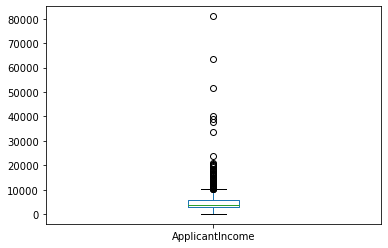

CoapplicantIncome
AxesSubplot(0.125,0.125;0.775x0.755)


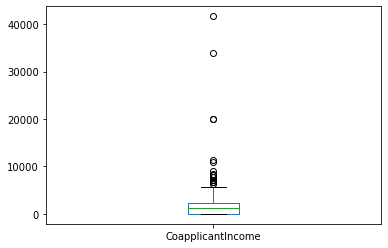

LoanAmount
AxesSubplot(0.125,0.125;0.775x0.755)


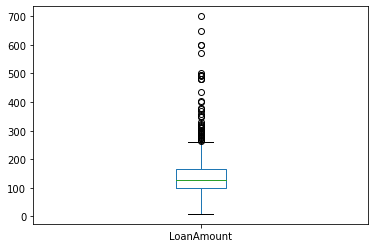

Loan_Amount_Term
AxesSubplot(0.125,0.125;0.775x0.755)


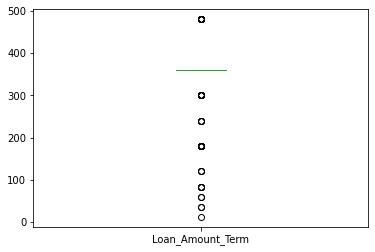

Credit_History
AxesSubplot(0.125,0.125;0.775x0.755)


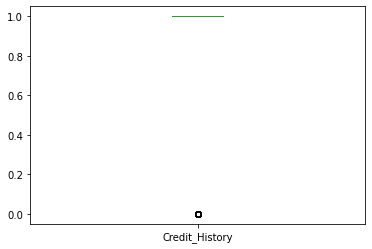

Property_Area
AxesSubplot(0.125,0.125;0.775x0.755)


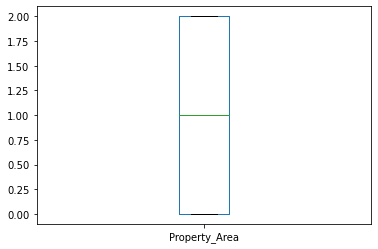

Loan_Status
AxesSubplot(0.125,0.125;0.775x0.755)


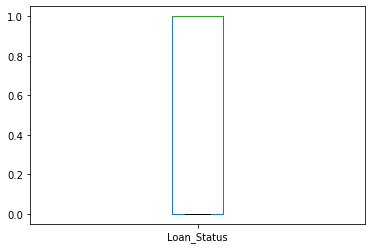

In [48]:
for i in df:
    print(i)
    print(df[i].plot.box())
    plt.show()

These columns have outliers and needs to be trated.
- LoanAmount
- Loan_Amount_Term
- ApplicantIncome


In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [51]:
print(np.where(z<3))

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [52]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [53]:
df_new=df[(z<3).all(axis=1)]

In [54]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [55]:
df_new.shape

(577, 13)

In [56]:
df.shape

(614, 13)

In [57]:
print("data loss =",((614-577)/100))

data loss = 0.37


### checking for skewness

In [58]:
df_new.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Loan_ID
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 613.0
Minimum : 0.0


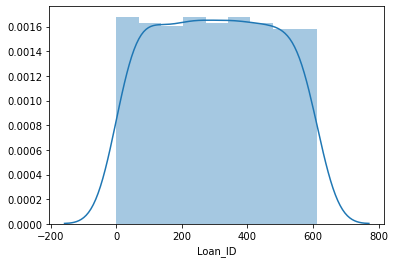

Gender
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


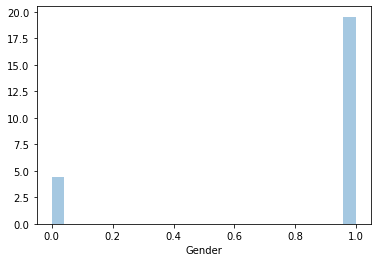

Married
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


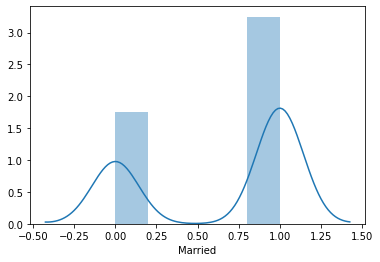

Dependents
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 3.0
Minimum : 0.0


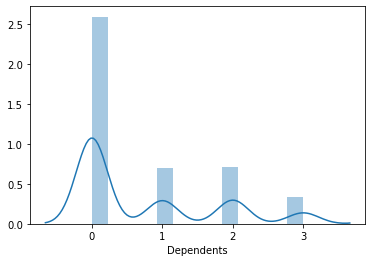

Education
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


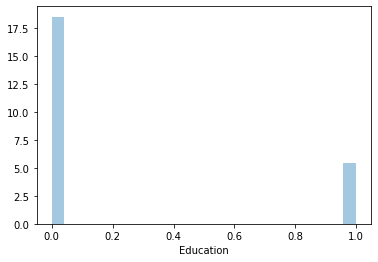

Self_Employed
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


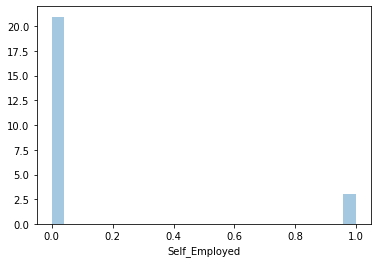

ApplicantIncome
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 20667
Minimum : 150


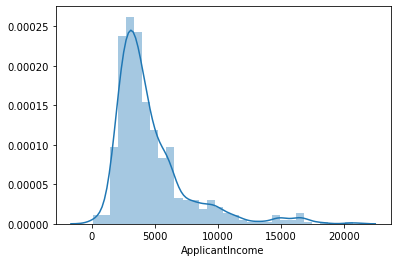

CoapplicantIncome
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 8980.0
Minimum : 0.0


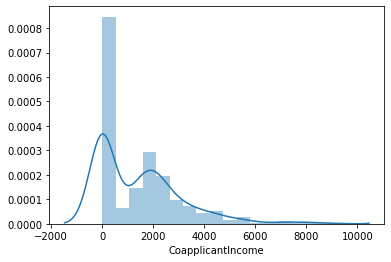

LoanAmount
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 380.0
Minimum : 9.0


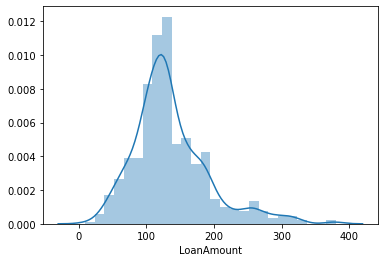

Loan_Amount_Term
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 480.0
Minimum : 180.0


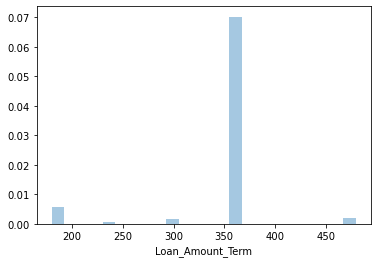

Credit_History
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


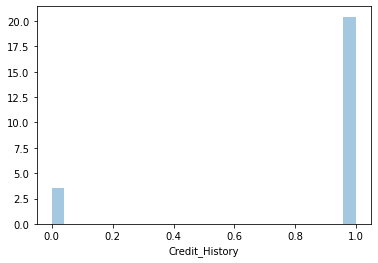

Property_Area
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 2.0
Minimum : 0.0


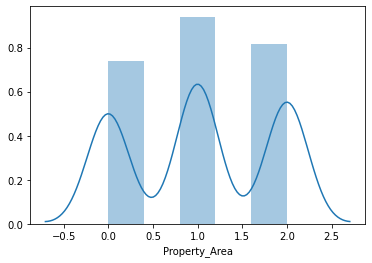

Loan_Status
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1.0
Minimum : 0.0


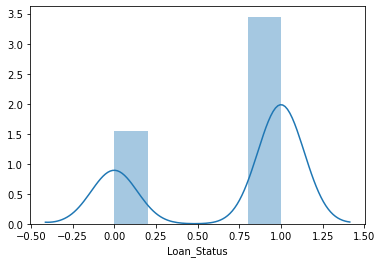

In [59]:
for i in df_new:
    print (i)
    print(sns.distplot(df_new[i]))
    print("Maximum :" , df_new[i].max())
    print("Minimum :" , df_new[i].min())
    plt.show()

keeping threshold value(-+.5)
columns having skewness:-
    - >  Gender - categorical
    - >  Married - categorical 
    - >  Dependents - categorical
    - >  Education - categorical
    - >  Self_Employed - categorical
    - >  ApplicantIncome - continous
    - >  CoapplicantIncome - continous
    - >  LoanAmount - continous          
    - >  Loan_Amount_Term  - continous 
    - >  Credit_History - continous     
    

In [60]:
# We only remove skewness from continous data

In [61]:
# using yeojohnson.

In [62]:
from scipy.stats import yeojohnson

In [63]:
df_new['ApplicantIncome']=yeojohnson(df_new["ApplicantIncome"],0)
df_new['ApplicantIncome'].skew()

-0.20491277344947714

In [64]:
df_new['CoapplicantIncome']=yeojohnson(df_new["CoapplicantIncome"],0)
df_new['CoapplicantIncome'].skew()

-0.21675695794770106

In [65]:
df_new['LoanAmount']=yeojohnson(df_new["LoanAmount"],0)
df_new['LoanAmount'].skew()

-0.6691962490193747

In [66]:
df_new['Loan_Amount_Term']=yeojohnson(df_new["Loan_Amount_Term"],0)
df_new['Loan_Amount_Term'].skew()

-2.7370793760639387

In [67]:
df_new['Credit_History']=yeojohnson(df_new["Credit_History"],0)
df_new['Credit_History'].skew()

-1.9760428373018362

### Making dataframe ready for ML models

In [68]:
features=df_new.drop('Loan_Status',axis=1)
target=df_new["Loan_Status"]

In [69]:
features.shape

(577, 12)

In [70]:
target

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

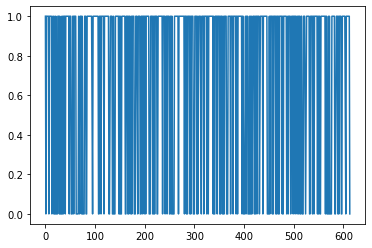

In [71]:
plt.plot(target)

### Data scaling

In [72]:
### Using Min Max Scaler to scale thee data

In [73]:
from sklearn.preprocessing import StandardScaler


In [74]:
ss=StandardScaler()
ss.fit_transform(features)

array([[-1.72210857,  0.47713685, -1.36251079, ...,  0.25901085,
         0.41851254,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ...,  0.25901085,
         0.41851254, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  0.25901085,
         0.41851254,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ...,  0.25901085,
         0.41851254,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ...,  0.25901085,
         0.41851254,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  0.25901085,
        -2.38941464, -0.03952504]])

## Building Machine Learning Models

### Importing  ML Algorithms:-

In [75]:
#Algorithms:-
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
gnb=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [77]:
#using logistic regression

# taking test size as 30%


maxAccu=0
maxRS= 0
for i in range (1,200):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(features_train,target_train)
    predrf=lr.predict(features_test)
    acc=accuracy_score(target_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
   
        
print('Best accuracy is',maxAccu,' on Random_state', maxRS)

Best accuracy is 0.8850574712643678  on Random_state 12


### Creating train-test split

In [78]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=12)

### Logistic regression

In [79]:
lr.fit(features_train,target_train)
lr.score(features_train,target_train)
predlr=lr.predict(features_test)

print(accuracy_score(target_test,predlr))
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

0.8850574712643678
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

         0.0       0.96      0.55      0.70        42
         1.0       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



### GaussianNB

In [80]:
gnb.fit(features_train,target_train)
gnb.score(features_train,target_train)
predgnb=gnb.predict(features_test)


print(accuracy_score(target_test,predgnb))

print(confusion_matrix(target_test,predgnb))

print(classification_report(target_test,predgnb))

0.8735632183908046
[[ 23  19]
 [  3 129]]
              precision    recall  f1-score   support

         0.0       0.88      0.55      0.68        42
         1.0       0.87      0.98      0.92       132

    accuracy                           0.87       174
   macro avg       0.88      0.76      0.80       174
weighted avg       0.87      0.87      0.86       174



### RandomForestClassifier

In [81]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
predrf=rf.predict(features_test)

print(accuracy_score(target_test,predrf))
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

0.8390804597701149
[[ 24  18]
 [ 10 122]]
              precision    recall  f1-score   support

         0.0       0.71      0.57      0.63        42
         1.0       0.87      0.92      0.90       132

    accuracy                           0.84       174
   macro avg       0.79      0.75      0.76       174
weighted avg       0.83      0.84      0.83       174



### SupportVectorClassifier

In [82]:
svc.fit(features_train,target_train)
svc.score(features_train,target_train)
predsvc=svc.predict(features_test)

print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))

0.7586206896551724
[[  0  42]
 [  0 132]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        42
         1.0       0.76      1.00      0.86       132

    accuracy                           0.76       174
   macro avg       0.38      0.50      0.43       174
weighted avg       0.58      0.76      0.65       174



### DecissionTreeClassifier

In [83]:
dtc.fit(features_train,target_train)
dtc.score(features_train,target_train)
preddtc=dtc.predict(features_test)

print(accuracy_score(target_test,preddtc))
print(confusion_matrix(target_test,preddtc))
print(classification_report(target_test,preddtc))

0.7183908045977011
[[29 13]
 [36 96]]
              precision    recall  f1-score   support

         0.0       0.45      0.69      0.54        42
         1.0       0.88      0.73      0.80       132

    accuracy                           0.72       174
   macro avg       0.66      0.71      0.67       174
weighted avg       0.78      0.72      0.74       174



### KNeighboursClassifier()

In [84]:
knn.fit(features_train,target_train)
knn.score(features_train,target_train)
predknn=knn.predict(features_test)

print(accuracy_score(target_test,predknn))
print(confusion_matrix(target_test,predknn))
print(classification_report(target_test,predknn))

0.6494252873563219
[[  8  34]
 [ 27 105]]
              precision    recall  f1-score   support

         0.0       0.23      0.19      0.21        42
         1.0       0.76      0.80      0.77       132

    accuracy                           0.65       174
   macro avg       0.49      0.49      0.49       174
weighted avg       0.63      0.65      0.64       174



### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
lrscore=cross_val_score(lr,features,target,cv=7)
print('lrscore is...', lrscore)
print('lrscore.mean',lrscore.mean(),'lrscore.std',lrscore.std())

gnbscore=cross_val_score(gnb,features,target,cv=7)
print('gnbscore is...',gnbscore)
print('gnbscore.mean',gnbscore.mean(),'gnbscore.std',gnbscore.std())

rfscore=cross_val_score(rf,features,target,cv=7)
print('rfscore is...', rfscore)
print('rfscore.mean',rfscore.mean(),'rfscore.std',rfscore.std())

svcscore=cross_val_score(svc,features,target,cv=7)
print('svcscore is...',svcscore)
print('svcscore.mean',svcscore.mean(),'svcscore.std',svcscore.std())


dtcscore=cross_val_score(dtc,features,target,cv=7)
print('dtcscore is...',dtcscore)
print('dtcscore.mean',dtcscore.mean(),'dtcscore.std',dtcscore.std())



knnscore=cross_val_score(knn,features,target,cv=7)
print('knnscore is...',knnscore)
print('knnscore.mean=',knnscore.mean(),'knnscore.std',knnscore.std())


lrscore is... [0.8313253  0.78313253 0.75903614 0.80487805 0.86585366 0.82926829
 0.85365854]
lrscore.mean 0.8181646446412829 lrscore.std 0.03531595044275088
gnbscore is... [0.8313253  0.75903614 0.75903614 0.80487805 0.86585366 0.79268293
 0.85365854]
gnbscore.mean 0.8094958230133076 gnbscore.std 0.039640226007566774
rfscore is... [0.3373494  0.79518072 0.72289157 0.80487805 0.84146341 0.80487805
 0.85365854]
rfscore.mean 0.7371856765039251 rfscore.std 0.16777582205449626
svcscore is... [0.68674699 0.68674699 0.68674699 0.69512195 0.69512195 0.69512195
 0.68292683]
svcscore.mean 0.689790520968893 svcscore.std 0.004783483324207724
dtcscore is... [0.30120482 0.71084337 0.68674699 0.7195122  0.81707317 0.68292683
 0.53658537]
dtcscore.mean 0.6364132488140716 dtcscore.std 0.15680314393526507
knnscore is... [0.37349398 0.48192771 0.40963855 0.69512195 0.69512195 0.68292683
 0.68292683]
knnscore.mean= 0.5744511145627808 knnscore.std 0.13562784946962853


The minimum diffrence in accuracy and cross validation score is for Logistic Regression(6),
- so this is our best fit model

### Hyper parameter tunning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# creating para list to pass GridSearchCV

parameters=  [
    {'penalty':['l1','l2','elasticnet'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['lbfs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100,1000,2500,5000]
     }
]

In [89]:
GCV = GridSearchCV(LogisticRegression(),parameters,cv=5)

In [90]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [91]:
GCV.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [92]:
GCV_pred=GCV.best_estimator_.predict(features_test)

In [93]:
accuracy_score(target_test,GCV_pred)

0.8850574712643678

In [94]:
### My accuracy score increased by 8.64%

###  Concluding Remarks

Best fit model is LogisticRegression tho GridsearchCV increased accuracy score by 8.64%